Explorative Data Analysis

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

C:\Users\JOJO JOHNSON\.conda\envs\COVID\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
mpl.rcParams['figure.figsize'] = (24, 18)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

Begins 

In [4]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

,date,Italy,US,Spain,Germany,"Korea, South"
109,2020-05-10,219070,1329260,224350,171879,10909
108,2020-05-09,218268,1309550,223578,171324,10874
107,2020-05-08,217185,1283929,222857,170588,10840
106,2020-05-07,215858,1257023,221447,169430,10822
105,2020-05-06,214457,1229331,220325,168162,10810


<Figure size 1728x1296 with 0 Axes>

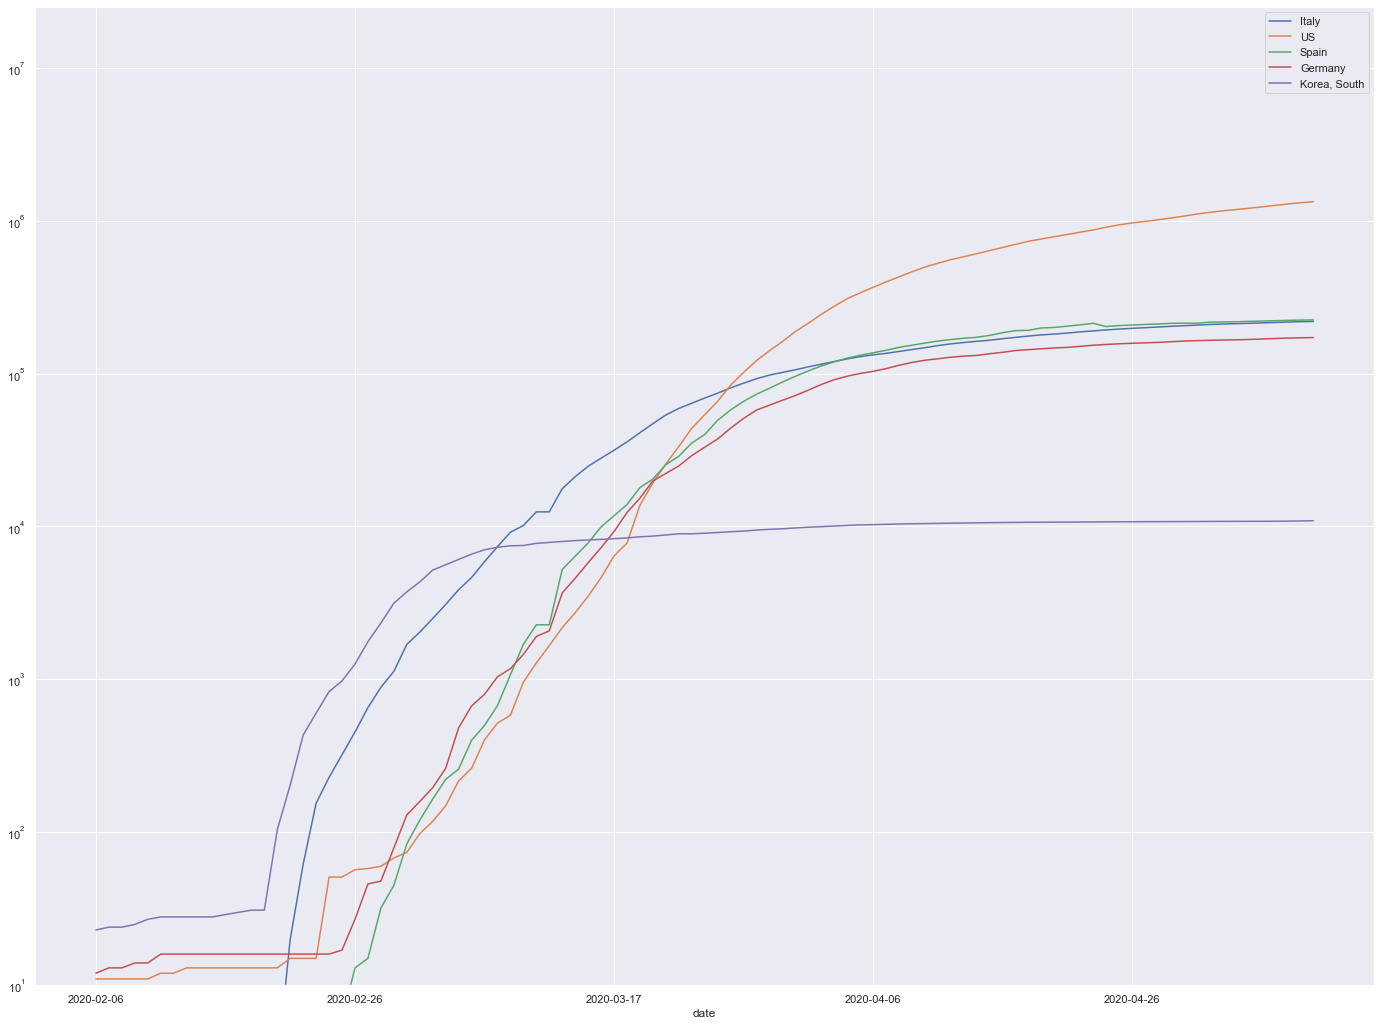

In [16]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 25000000)
ax.set_yscale('log')

Plotly

In [24]:
fig = go.Figure()

In [26]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [42]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=6, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,7.5])


fig.update_layout(xaxis_rangeslider_visible=True)

#fig.show(renderer='chrome')
fig.show()

In [45]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [46]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [47]:
app.run_server(debug=True, use_reloader=False)


Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 948-539-259
Debugger PIN: 948-539-259
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
